# Telco Customer Churn Analysis

- #### Import Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Import Dataset 
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#check how many rows and colums in the dataframe
df.shape

(7043, 21)

In [5]:
#Check Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- #### Replaced blank values with 0 since tenure is 0 and no total charges were recorded, and converted the data type from object to float.

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [18]:
df.isnull().sum().sum()

np.int64(0)

In [19]:
df["customerID"].duplicated().sum()

np.int64(0)

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- #### Need to Convert Senior Citizen values (0 and 1) to Yes/No for better readability.

In [23]:
def conv(value):
    if value == 1:
        return("Yes")
    else:
        return("No")
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)       
        

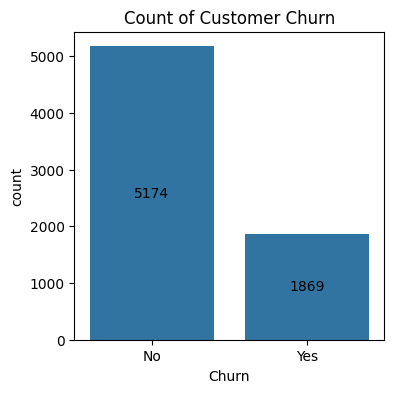

In [96]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0],label_type='center')
plt.title("Count of Customer Churn")
plt.show()

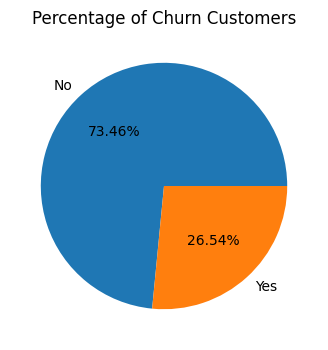

In [94]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage of Churn Customers" )
plt.show()

- #### The pie chart shows that 26.54% of customers have churned, which means more than one in four customers are leaving the service. This highlights a serious need for better retention strategies.

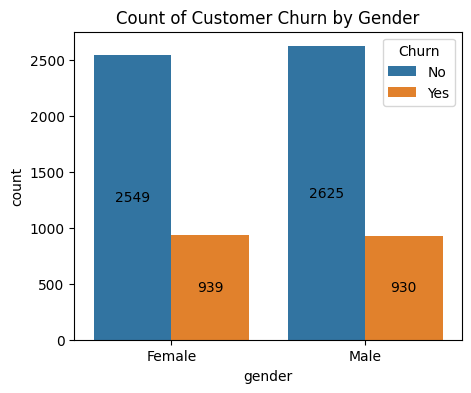

In [102]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0],label_type='center')
ax.bar_label(ax.containers[1],label_type='center')
plt.title("Count of Customer Churn by Gender")
plt.show()

- #### Gender does not have a strong impact on churn

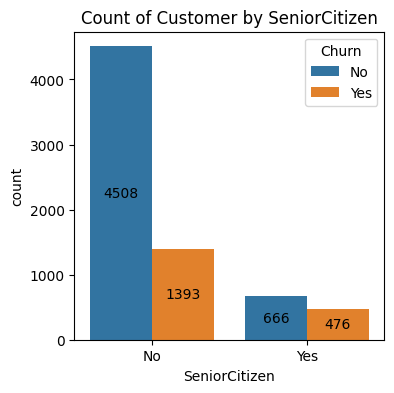

In [108]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container,label_type='center')

plt.title("Count of Customer by SeniorCitizen")
plt.show()

- #### Senior citizens represent a smaller portion of the overall customer base.

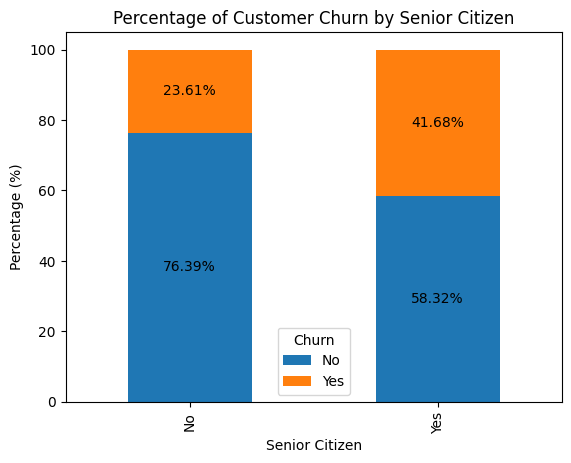

In [131]:
stack_data = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot 100% stacked bar chart
ax = stack_data.plot(kind='bar', stacked=True)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f%%', label_type='center')

plt.title("Percentage of Customer Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.show()

- #### A higher percentage of senior citizens tend to churn compared to non-senior citizens.

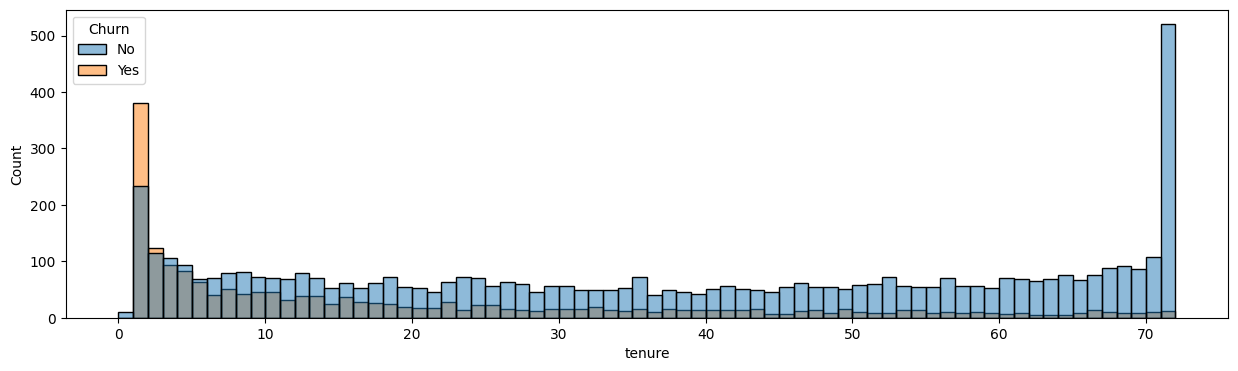

In [127]:
plt.figure(figsize=(15,4))
sns.histplot(x= "tenure",data= df, bins= 72, hue = "Churn")
plt.show()

- #### Customers with shorter tenure(0 to 1) show a significantly higher churn rate, while long-term customers are more loyal.

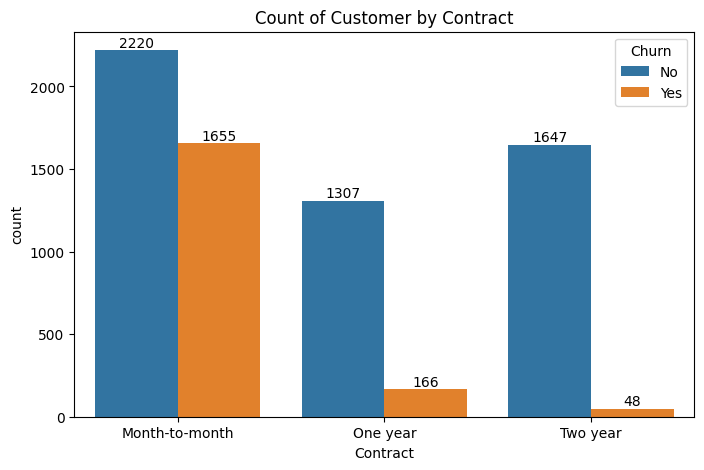

In [219]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of Customer by Contract")
plt.show()

In [135]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [136]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- #### Customers with month-to-month contracts have the highest churn rate.

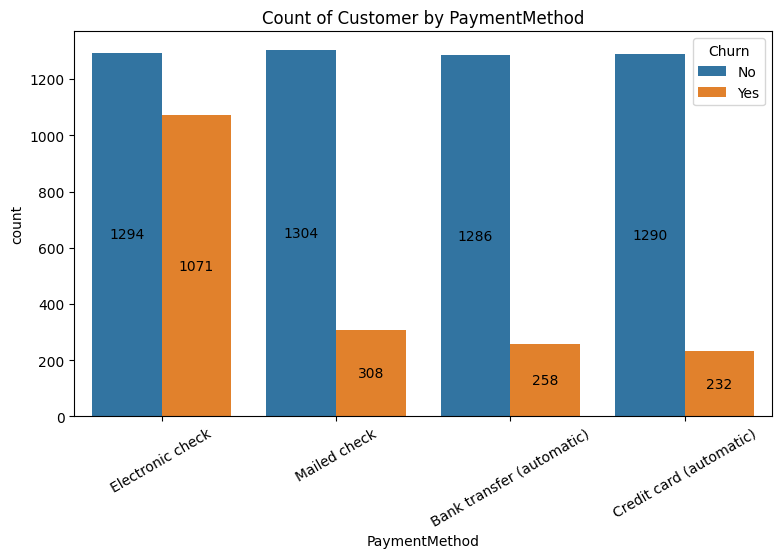

In [155]:
plt.figure(figsize = (9,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
for container in ax.containers:
    ax.bar_label(container,label_type = 'center')

plt.title("Count of Customer by PaymentMethod")
plt.xticks(rotation = 30)
plt.show()

- #### Customers using Electronic Check show noticeably higher churn compared to other payment methods

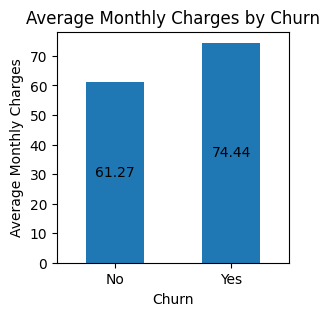

In [218]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Calculate average MonthlyCharges by Churn
avg_charges = df.groupby('Churn')['MonthlyCharges'].mean()

# Plot bar chart
plt.figure(figsize=(3,3))
ax = avg_charges.plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type = 'center')
    
plt.title("Average Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Average Monthly Charges")
plt.xticks(rotation=0)

plt.show()

 - ####  Customers who churn generally have higher average monthly charges compared to non-churned customers. This shows that pricing is a strong factor affecting customer decisions to leave.

In [178]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

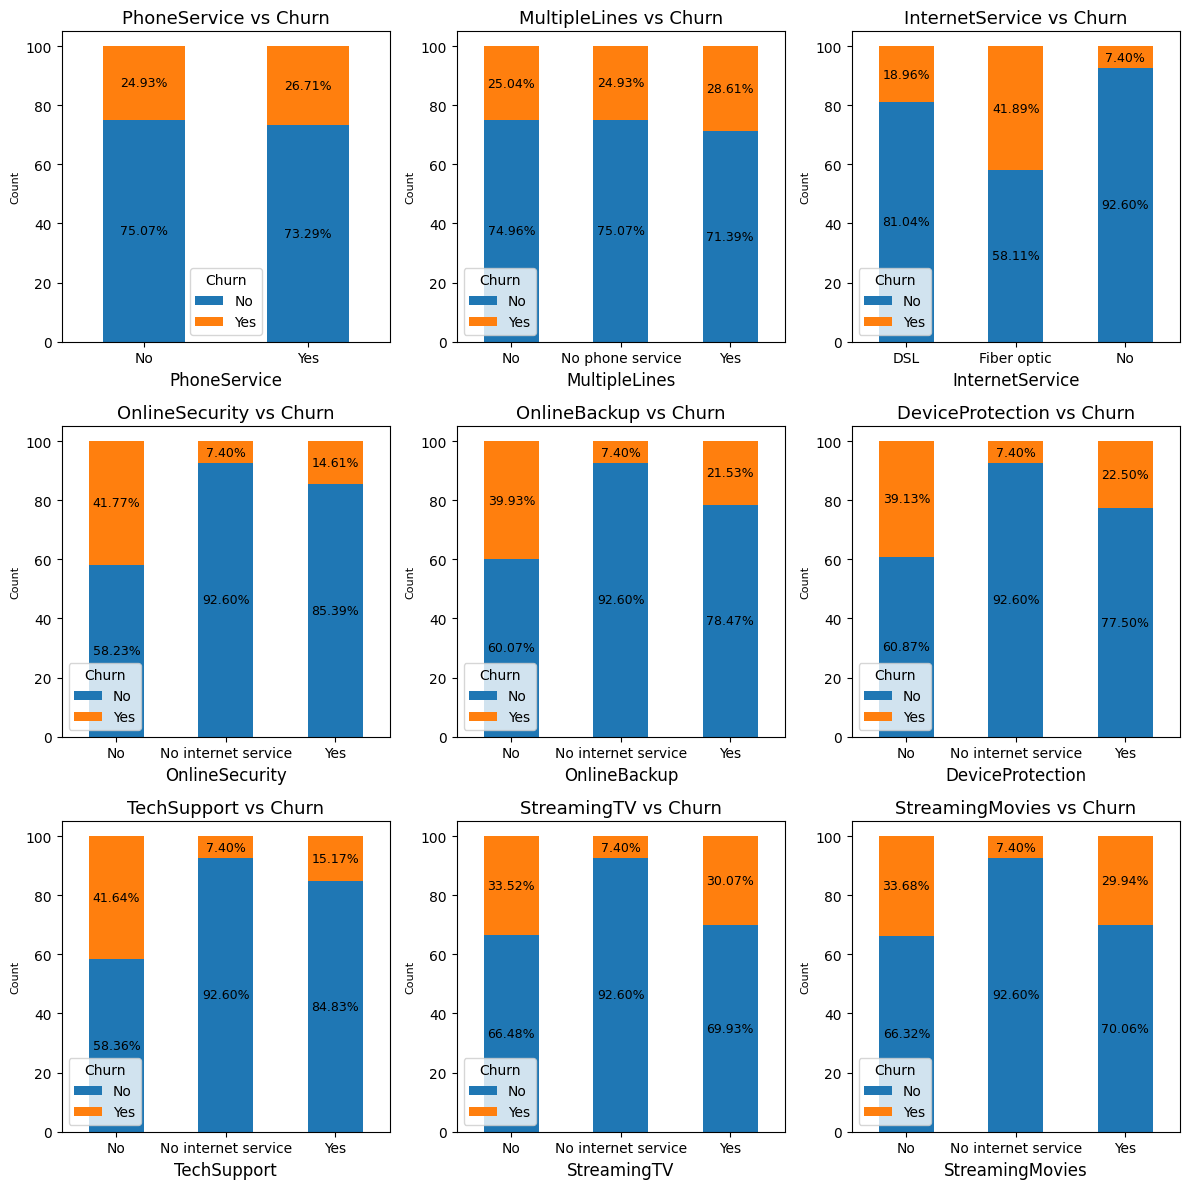

In [212]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for ax, col in zip(axes, columns):
    
    # Cross-tabulation
    cross_tab = pd.crosstab(df[col], df['Churn'])

    percent_data = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

    # Plot stacked bar
    percent_data.plot(kind='bar', stacked=True, ax=ax)

    for container in ax.containers:
        ax.bar_label(container, label_type='center',fmt='%1.2f%%', fontsize=9)

    ax.set_title(f'{col} vs Churn', fontsize=13)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=8)
    ax.tick_params(axis='x', rotation=360)

plt.tight_layout()
plt.show()

- #### Customers who do not have additional services such as OnlineSecurity, TechSupport, or DeviceProtection tend to churn more. Customers with multiple bundled services are more loyal, suggesting that service bundling is effective in improving retention.

## CONCLUSION

###   &nbsp;&nbsp;&nbsp;&nbsp; This analysis confirms that customer churn is strongly influenced by contract type, tenure, monthly charges, and service usage. By improving early engagement, offering long-term contracts, and encouraging bundled services, the company can significantly reduce churn and increase customer lifetime value.